## Import libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np
from pyforest import *

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


## Exploring the database

In [2]:
# Open the excel database 
# In Row the 184 countries and the years
health = pd.read_excel('C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/data/World bank/Data_Health_Source3.xlsx')
pd.set_option('display.max_columns', None)
health.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Country Name Country Code  Year  Birth rate (per 1,000 people)  \
0    Australia          AUS  2015                           12.9   
1    Australia          AUS  2014                           13.2   
2    Australia          AUS  2013                           13.3   
3    Australia          AUS  2012                           13.7   
4    Australia          AUS  2011                           13.6   

   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  \
0                                           4.569557                                 
1                                           4.262027                                 
2                                           4.262027                                 
3                                           4.262027                                 
4                                           4.262027                                 

   Cause of death, by injury (% of total)  \
0                                5.857025   
1                                5.722820   
2                                5.722820   
3                                5.722820   
4                                5.722820   

   Cause of death, by non-communicable diseases (% of total)  \
0                                          89.573419           
1                                          90.015155           
2                                          90.015155           
3                                          90.015155           
4                                          90.015155           

   Current health expenditure (% of GDP)  \
0                               9.327589   
1                               9.035971   
2                               8.761164   
3                               8.675648   
4                               8.541538   

   Current health expenditure per capita, PPP ( $)  \
0                                      4392.074219   
1                                      4283.142090   
2                                      4161.620117   
3                                      3778.473633   
4                                      3760.759766   

   Death rate (per 1,000 people)  \
0                            6.6   
1                            6.6   
2                            6.4   
3                            6.6   
4                            6.6   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                                6.5     
1                                                6.5     
2                                                6.5     
3                                                6.5     
4                                                6.6     

   Domestic general government health expenditure (% of GDP)  \
0                                           6.383698           
1                                           6.100497           
2                                           5.937055           
3                                           6.180068           
4                                           6.257556           

   Domestic general government health expenditure per capita, PPP ($)  \
0                                        3005.886782                    
1                                        2891.697554                    
2                                        2820.146826                    
3                                        2691.582711                    
4                                        2755.143820                    

   Domestic private health expenditure per capita, PPP  ($)  \
0                                        1386.187406          
1                                        1391.444573          
2                                        1341.473459          
3                                        1086.891027          
4                                        1005.615985          

   Fertility rate, total (births per woman)  GNI per capita (

In [3]:
health.shape


(602, 45)

## Pivot and Melt

In [4]:
# years = [i for i in np.arange(2002,2022,1)]


In [5]:
# health.melt(health, id_vars=['Country_Name'], value_vars=[(years)])


In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 45 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country Name                                                                     602 non-null    object 
 1   Country Code                                                                     602 non-null    object 
 2   Year                                                                             602 non-null    int64  
 3   Birth rate (per 1,000 people)                                                    602 non-null    float64
 4   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  602 non-null    float64
 5   Cause of death, by injury (% of total)                                           602 non-null    float64
 6   Cause of d

In [7]:
health = health.apply(lambda x : x.replace("..", np.nan))
health.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Country Name Country Code  Year  Birth rate (per 1,000 people)  \
0    Australia          AUS  2015                           12.9   
1    Australia          AUS  2014                           13.2   
2    Australia          AUS  2013                           13.3   
3    Australia          AUS  2012                           13.7   
4    Australia          AUS  2011                           13.6   

   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  \
0                                           4.569557                                 
1                                           4.262027                                 
2                                           4.262027                                 
3                                           4.262027                                 
4                                           4.262027                                 

   Cause of death, by injury (% of total)  \
0                                5.857025   
1                                5.722820   
2                                5.722820   
3                                5.722820   
4                                5.722820   

   Cause of death, by non-communicable diseases (% of total)  \
0                                          89.573419           
1                                          90.015155           
2                                          90.015155           
3                                          90.015155           
4                                          90.015155           

   Current health expenditure (% of GDP)  \
0                               9.327589   
1                               9.035971   
2                               8.761164   
3                               8.675648   
4                               8.541538   

   Current health expenditure per capita, PPP ( $)  \
0                                      4392.074219   
1                                      4283.142090   
2                                      4161.620117   
3                                      3778.473633   
4                                      3760.759766   

   Death rate (per 1,000 people)  \
0                            6.6   
1                            6.6   
2                            6.4   
3                            6.6   
4                            6.6   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                                6.5     
1                                                6.5     
2                                                6.5     
3                                                6.5     
4                                                6.6     

   Domestic general government health expenditure (% of GDP)  \
0                                           6.383698           
1                                           6.100497           
2                                           5.937055           
3                                           6.180068           
4                                           6.257556           

   Domestic general government health expenditure per capita, PPP ($)  \
0                                        3005.886782                    
1                                        2891.697554                    
2                                        2820.146826                    
3                                        2691.582711                    
4                                        2755.143820                    

   Domestic private health expenditure per capita, PPP  ($)  \
0                                        1386.187406          
1                                        1391.444573          
2                                        1341.473459          
3                                        1086.891027          
4                                        1005.615985          

   Fertility rate, total (births per woman)  GNI per capita (

In [8]:
health.isna().sum()/len(health)

Country Name                                                                       0.0
Country Code                                                                       0.0
Year                                                                               0.0
Birth rate (per 1,000 people)                                                      0.0
Cause of death, by communicable diseasesl and nutrition conditions (% of total)    0.0
Cause of death, by injury (% of total)                                             0.0
Cause of death, by non-communicable diseases (% of total)                          0.0
Current health expenditure (% of GDP)                                              0.0
Current health expenditure per capita, PPP ( $)                                    0.0
Death rate (per 1,000 people)                                                      0.0
Diabetes prevalence (% of population ages 20 to 79)                                0.0
Domestic general government health expendit

## Drop the unrelevant columns

In [9]:
# energy.drop(energy.columns.difference(['country', 'iso_code', 'year',  'population', 'gdp', 'greenhouse_gas_emissions', 'electricity_demand', ' primary_energy_consumption', ' renewables_consumption', ' carbon_intensity_elec', 'low_carbon_consumption', 'fossil_fuel_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption', 'solar_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']), 1, inplace=True)
# energy2 = energy[energy.columns.difference(['gdp', 'population'])]


In [10]:
health.shape


(602, 45)

In [11]:
health['Life expectancy at birth, total (years)'].describe()

count    602.000000
mean      78.614937
std        3.196802
min       65.529756
25%       76.768293
50%       79.439024
75%       80.986585
max       83.793902
Name: Life expectancy at birth, total (years), dtype: float64

## Rename & Create relevant new columns for further analysis (C02 per cap, ...)

In [12]:
health_features = health[health.columns.difference(['Country Name', 'Country Code'])].astype('float')
health_country = health[['Country Name', 'Country Code']]
health = pd.concat([health_country,health_features], axis=1)
health.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 45 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country Name                                                                     602 non-null    object 
 1   Country Code                                                                     602 non-null    object 
 2   % of adults with hypertension                                                    602 non-null    float64
 3   Birth rate (per 1,000 people)                                                    602 non-null    float64
 4   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  602 non-null    float64
 5   Cause of death, by injury (% of total)                                           602 non-null    float64
 6   Cause of d

In [13]:
health_rich = health[health['GDP per capita, PPP ($)']>20000]
health_rich.head()


Country Name Country Code  % of adults with hypertension  \
0    Australia          AUS                           51.7   
1    Australia          AUS                           52.5   
2    Australia          AUS                           53.2   
3    Australia          AUS                           53.7   
4    Australia          AUS                           54.0   

   Birth rate (per 1,000 people)  \
0                           12.9   
1                           13.2   
2                           13.3   
3                           13.7   
4                           13.6   

   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  \
0                                           4.569557                                 
1                                           4.262027                                 
2                                           4.262027                                 
3                                           4.262027                                 
4                                           4.262027                                 

   Cause of death, by injury (% of total)  \
0                                5.857025   
1                                5.722820   
2                                5.722820   
3                                5.722820   
4                                5.722820   

   Cause of death, by non-communicable diseases (% of total)  \
0                                          89.573419           
1                                          90.015155           
2                                          90.015155           
3                                          90.015155           
4                                          90.015155           

   Current health expenditure (% of GDP)  \
0                               9.327589   
1                               9.035971   
2                               8.761164   
3                               8.675648   
4                               8.541538   

   Current health expenditure per capita, PPP ( $)  \
0                                      4392.074219   
1                                      4283.142090   
2                                      4161.620117   
3                                      3778.473633   
4                                      3760.759766   

   Death rate (per 1,000 people)  \
0                            6.6   
1                            6.6   
2                            6.4   
3                            6.6   
4                            6.6   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                                6.5     
1                                                6.5     
2                                                6.5     
3                                                6.5     
4                                                6.6     

   Domestic general government health expenditure (% of GDP)  \
0                                           6.383698           
1                                           6.100497           
2                                           5.937055           
3                                           6.180068           
4                                           6.257556           

   Domestic general government health expenditure per capita, PPP ($)  \
0                                        3005.886782                    
1                                        2891.697554                    
2                                        2820.146826                    
3                                        2691.582711                    
4                                        2755.143820                    

   Domestic private health expenditure per capita, PPP  ($)  \
0                                        1386.187406          
1                                        1391.444573          
2                                        1341.473459          
3      

In [14]:
# health['Diabetes prevalence (% of population ages 20 to 79)'].fillna(health['Diabetes prevalence (% of population ages 20 to 79)'].mean())
# health['Diabetes prevalence (% of population ages 20 to 79)']


In [15]:
# energy = energy[energy['gdp']>100000000000]


In [16]:
# energy['gdp'] = energy['gdp']/1000000000
# energy['population'] = energy['population']/1000000


In [17]:
# energy.rename(columns={'gdp':'gdp_B$', 'population':'pop_Million', 'greenhouse_gas_emissions':'M_Tons_C02_eq'},inplace=True) 
# energy = energy.round(0)


## Check, fill or drop the missing value per country and per columns

In [18]:
health_rich.isna().sum()

Country Name                                                                       0
Country Code                                                                       0
% of adults with hypertension                                                      0
Birth rate (per 1,000 people)                                                      0
Cause of death, by communicable diseasesl and nutrition conditions (% of total)    0
Cause of death, by injury (% of total)                                             0
Cause of death, by non-communicable diseases (% of total)                          0
Current health expenditure (% of GDP)                                              0
Current health expenditure per capita, PPP ( $)                                    0
Death rate (per 1,000 people)                                                      0
Diabetes prevalence (% of population ages 20 to 79)                                0
Domestic general government health expenditure (% of GDP)        

In [19]:
health_rich = health_rich.dropna()
health_rich.isna().sum()

Country Name                                                                       0
Country Code                                                                       0
% of adults with hypertension                                                      0
Birth rate (per 1,000 people)                                                      0
Cause of death, by communicable diseasesl and nutrition conditions (% of total)    0
Cause of death, by injury (% of total)                                             0
Cause of death, by non-communicable diseases (% of total)                          0
Current health expenditure (% of GDP)                                              0
Current health expenditure per capita, PPP ( $)                                    0
Death rate (per 1,000 people)                                                      0
Diabetes prevalence (% of population ages 20 to 79)                                0
Domestic general government health expenditure (% of GDP)        

In [20]:
health_rich.shape

(602, 45)

In [21]:
# energy['nuclear_consumption'] = energy['nuclear_consumption'].fillna(0)
# energy['biofuel_consumption'] = energy['biofuel_consumption'].fillna(0)
# energy = energy.dropna(subset=['coal_consumption'], axis=0)


In [22]:
# energy['Tons_C02_per_capita']=round(energy['M_Tons_C02_eq']/energy['pop_Million'], 1)
# energy['Tons_C02_per_GDP']=round(energy['M_Tons_C02_eq']/energy['gdp_B$']*1000,1)
# energy['GDP_per_capita']=round((energy['gdp_B$']/energy['pop_Million'])*1000,1)

In [23]:
# energy = energy.dropna(subset=['oil_consumption'], axis=0)
# energy = energy.reset_index()
# energy

In [24]:
# print(energy.shape)
# print(energy.isna().sum())

In [25]:
# energy.loc[energy['country']== 'Asia'].head(20)

### Extraction dataframe for data Viz on Tableau

In [26]:
# energy.to_excel("Energy_tableau.xlsx")

In [27]:
# energy.info()

# Selecting columns&rows, check correlation, train, split and run Linear model

### Drop redundant rows : Asia is the sum of all asian countries and run heatmap matrix

In [28]:
# energy.drop(energy[(energy['country'] == 'Asia')].index, inplace=True)
# energy.drop(energy[(energy['country'] == 'Europe')].index, inplace=True)
# energy.drop(energy[(energy['country'] == 'World')].index, inplace=True)

### Distribution plots of numerical variables

In [29]:
# Get the numerical variables from our dataset.
numerical = health.select_dtypes(include=np.number)
numerical.head()

<IPython.core.display.Javascript object>

% of adults with hypertension  Birth rate (per 1,000 people)  \
0                           51.7                           12.9   
1                           52.5                           13.2   
2                           53.2                           13.3   
3                           53.7                           13.7   
4                           54.0                           13.6   

   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  \
0                                           4.569557                                 
1                                           4.262027                                 
2                                           4.262027                                 
3                                           4.262027                                 
4                                           4.262027                                 

   Cause of death, by injury (% of total)  \
0                                5.857025   
1                                5.722820   
2                                5.722820   
3                                5.722820   
4                                5.722820   

   Cause of death, by non-communicable diseases (% of total)  \
0                                          89.573419           
1                                          90.015155           
2                                          90.015155           
3                                          90.015155           
4                                          90.015155           

   Current health expenditure (% of GDP)  \
0                               9.327589   
1                               9.035971   
2                               8.761164   
3                               8.675648   
4                               8.541538   

   Current health expenditure per capita, PPP ( $)  \
0                                      4392.074219   
1                                      4283.142090   
2                                      4161.620117   
3                                      3778.473633   
4                                      3760.759766   

   Death rate (per 1,000 people)  \
0                            6.6   
1                            6.6   
2                            6.4   
3                            6.6   
4                            6.6   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                                6.5     
1                                                6.5     
2                                                6.5     
3                                                6.5     
4                                                6.6     

   Domestic general government health expenditure (% of GDP)  \
0                                           6.383698           
1                                           6.100497           
2                                           5.937055           
3                                           6.180068           
4                                           6.257556           

   Domestic general government health expenditure per capita, PPP ($)  \
0                                        3005.886782                    
1                                        2891.697554                    
2                                        2820.146826                    
3                                        2691.582711                    
4                                        2755.143820                    

   Domestic private health expenditure per capita, PPP  ($)  \
0                                        1386.187406          
1                                        1391.444573          
2                                        1341.473459          
3                                        1086.891027          
4                                        1005.615985          

   Fertility rate, total (births per woman)     GDP (B$)  \
0       

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


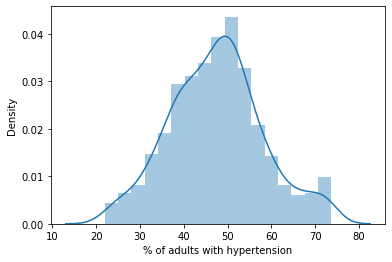

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


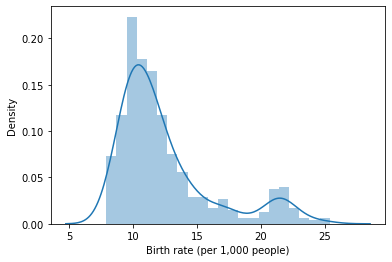

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


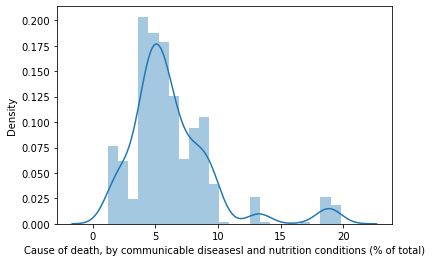

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


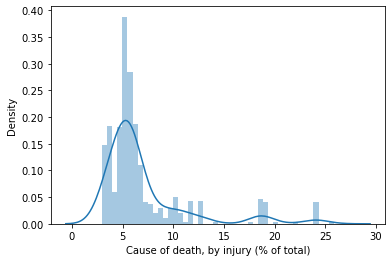

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


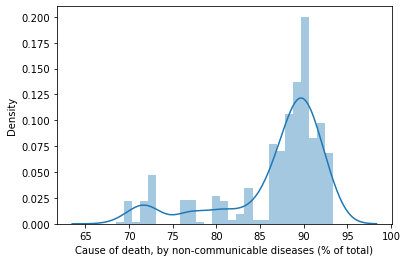

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


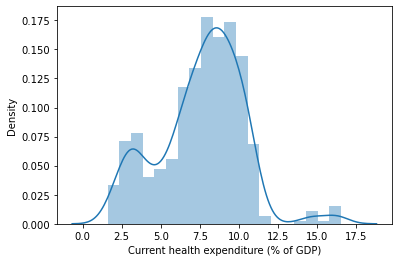

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


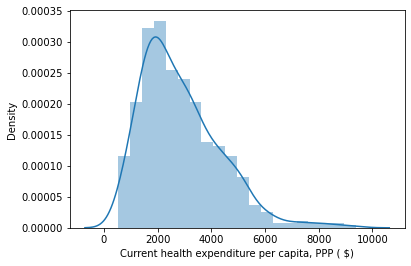

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


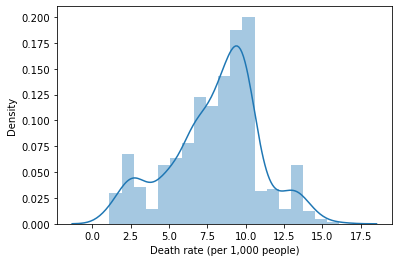

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


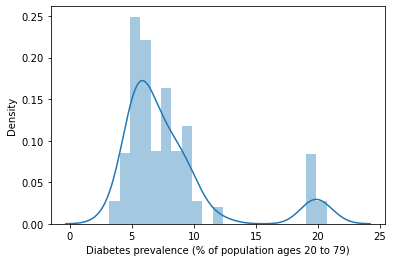

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


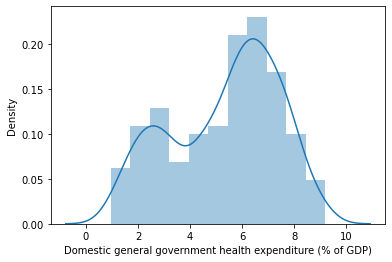

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


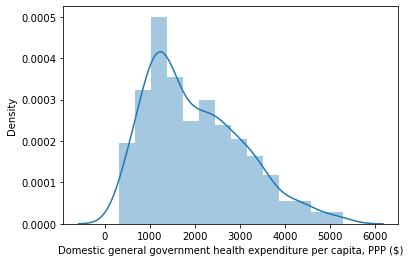

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


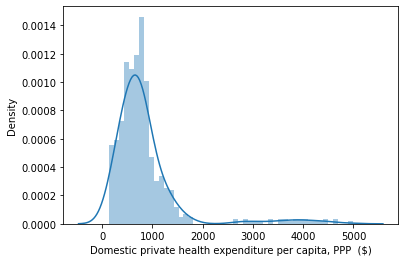

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


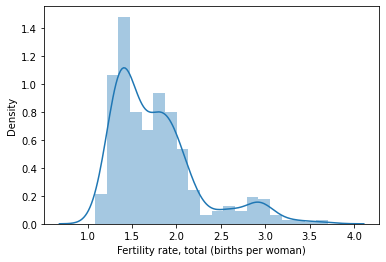

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


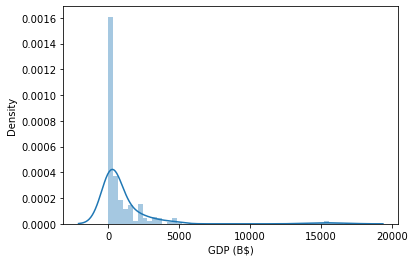

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


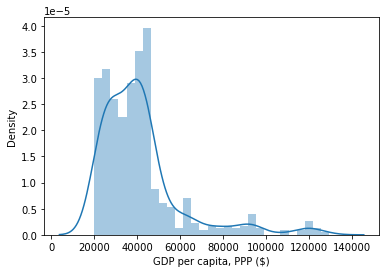

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


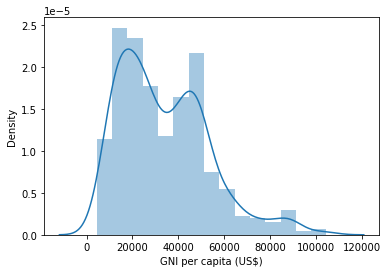

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


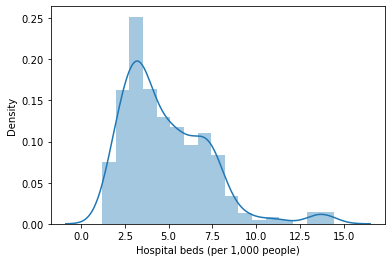

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


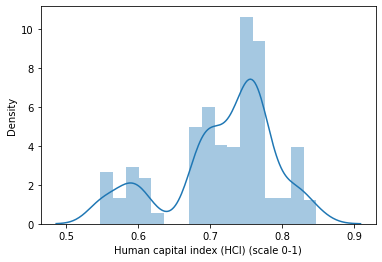

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


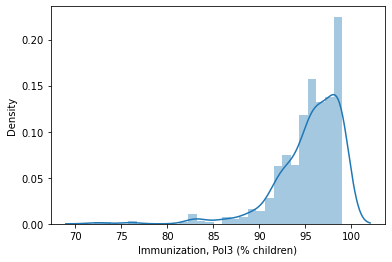

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


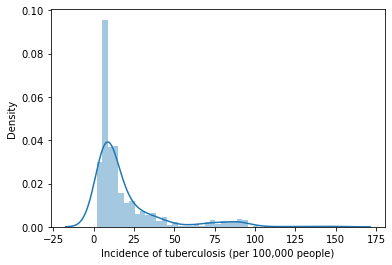

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


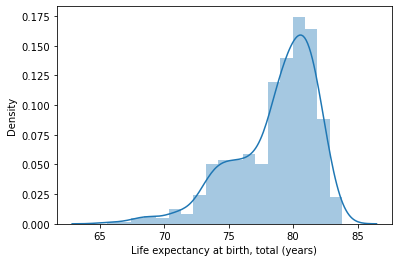

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


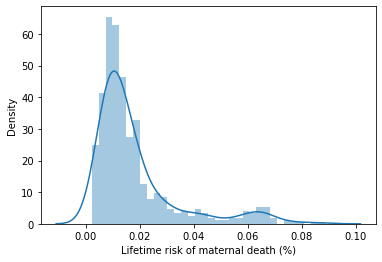

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


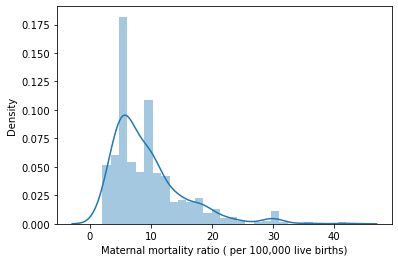

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


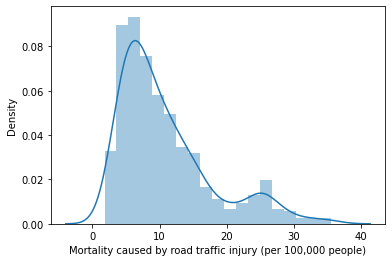

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


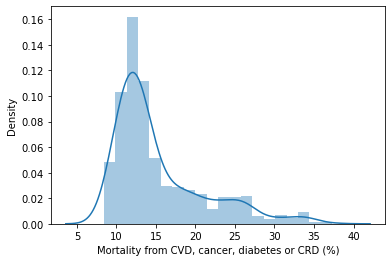

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


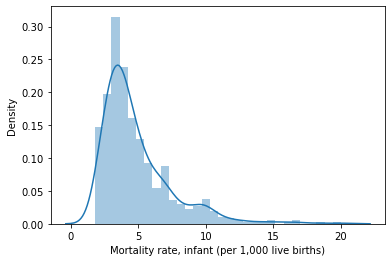

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


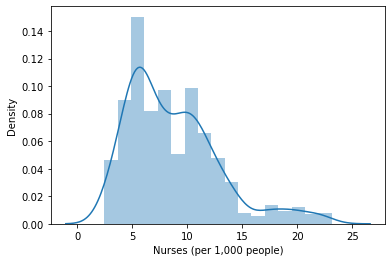

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


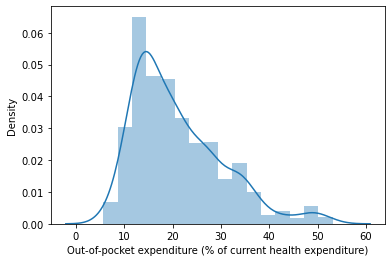

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


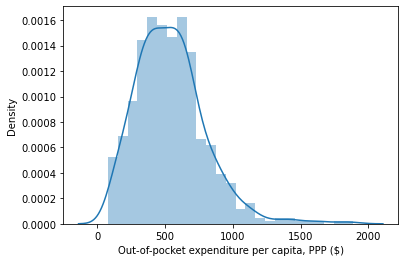

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


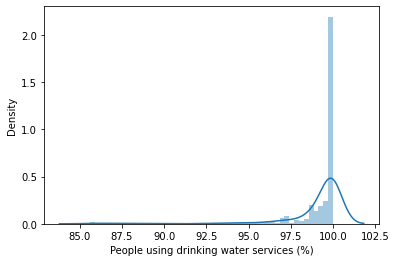

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


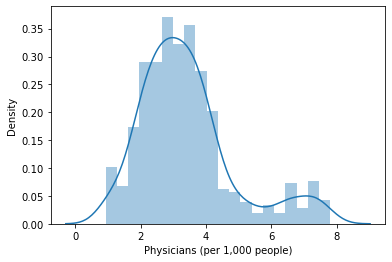

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


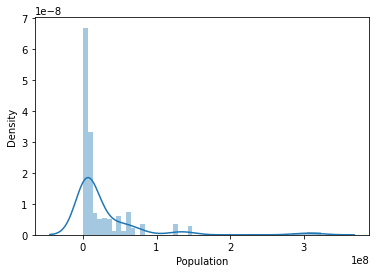

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


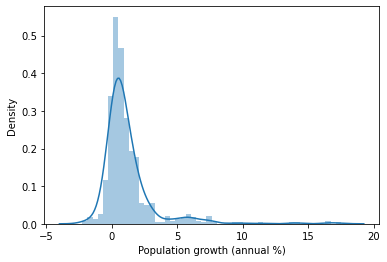

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


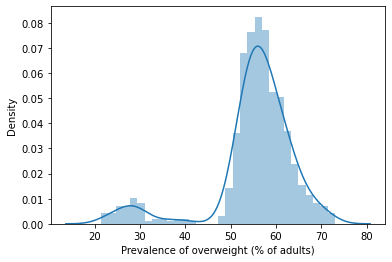

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


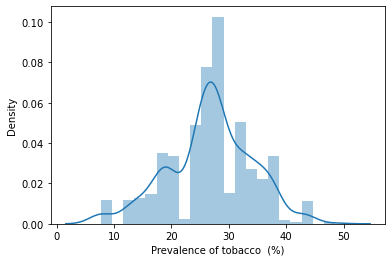

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


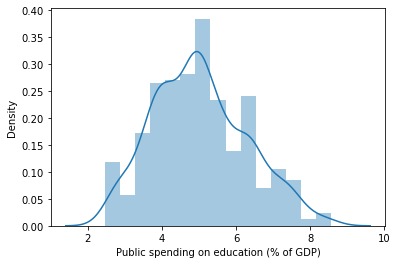

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


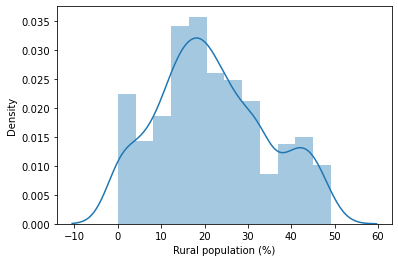

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


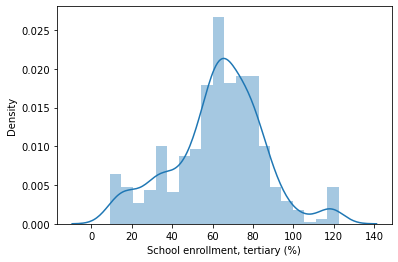

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


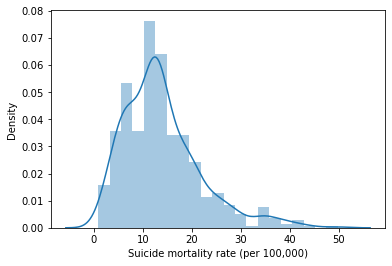

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


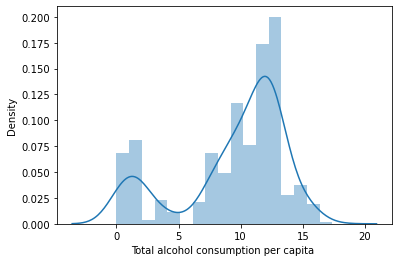

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


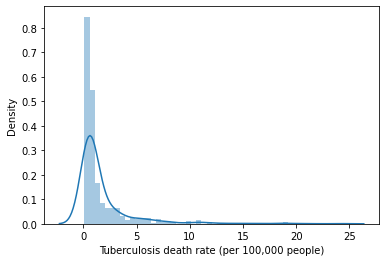

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


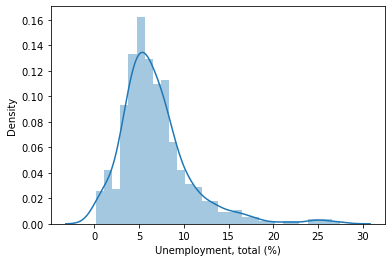

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


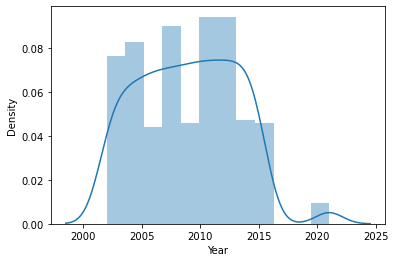

In [30]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

### Selection minimum relevant columns for analysis : only consumption of each energy

In [31]:
# energy.drop(energy.columns.difference(['M_Tons_C02_eq', 'wind_consumption', 'solar_consumption', 'other_renewable_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']), 1, inplace=True)
# energy.head()

### Heatmap to check correlation, (output : 'M_Tons_C02_eq')

% of adults with hypertension  Birth rate (per 1,000 people)  \
0                           51.7                           12.9   
1                           52.5                           13.2   
2                           53.2                           13.3   
3                           53.7                           13.7   
4                           54.0                           13.6   

   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  \
0                                           4.569557                                 
1                                           4.262027                                 
2                                           4.262027                                 
3                                           4.262027                                 
4                                           4.262027                                 

   Cause of death, by injury (% of total)  \
0                                5.857025   
1                                5.722820   
2                                5.722820   
3                                5.722820   
4                                5.722820   

   Cause of death, by non-communicable diseases (% of total)  \
0                                          89.573419           
1                                          90.015155           
2                                          90.015155           
3                                          90.015155           
4                                          90.015155           

   Current health expenditure (% of GDP)  \
0                               9.327589   
1                               9.035971   
2                               8.761164   
3                               8.675648   
4                               8.541538   

   Current health expenditure per capita, PPP ( $)  \
0                                      4392.074219   
1                                      4283.142090   
2                                      4161.620117   
3                                      3778.473633   
4                                      3760.759766   

   Death rate (per 1,000 people)  \
0                            6.6   
1                            6.6   
2                            6.4   
3                            6.6   
4                            6.6   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                                6.5     
1                                                6.5     
2                                                6.5     
3                                                6.5     
4                                                6.6     

   Domestic general government health expenditure (% of GDP)  \
0                                           6.383698           
1                                           6.100497           
2                                           5.937055           
3                                           6.180068           
4                                           6.257556           

   Domestic general government health expenditure per capita, PPP ($)  \
0                                        3005.886782                    
1                                        2891.697554                    
2                                        2820.146826                    
3                                        2691.582711                    
4                                        2755.143820                    

   Domestic private health expenditure per capita, PPP  ($)  \
0                                        1386.187406          
1                                        1391.444573          
2                                        1341.473459          
3                                        1086.891027          
4                                        1005.615985          

   Fertility rate, total (births per woman)     GDP (B$)  \
0       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

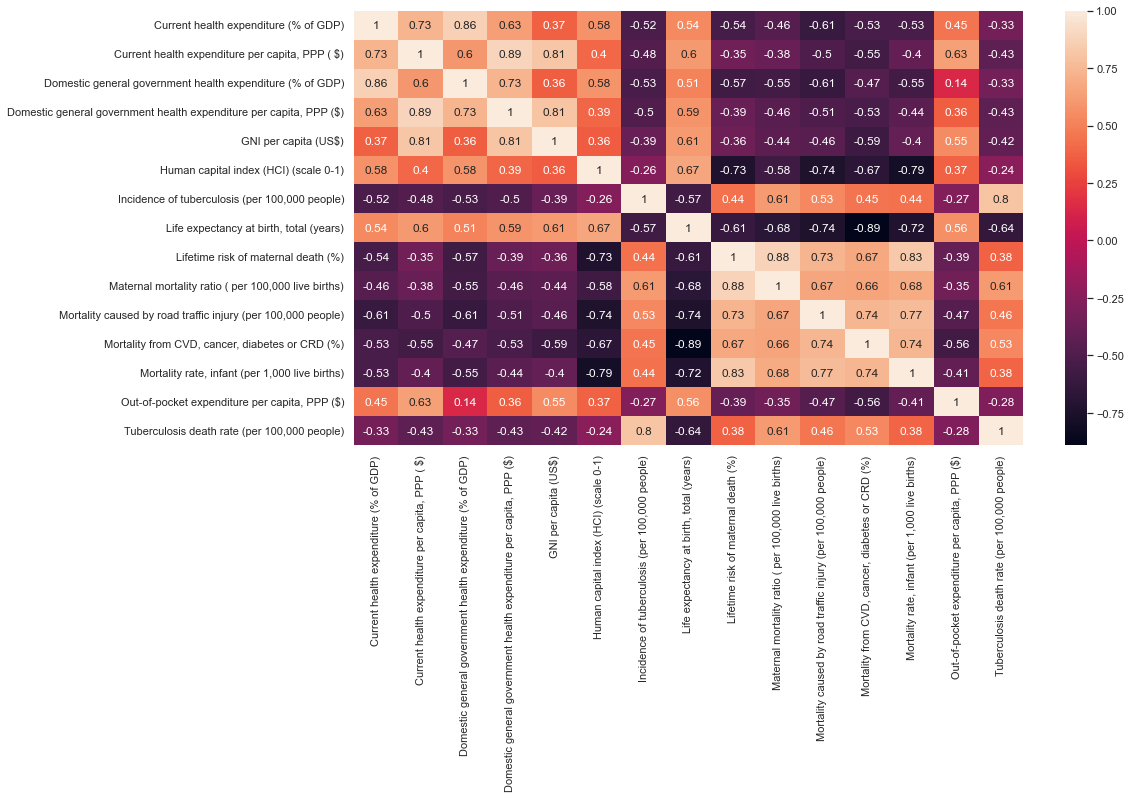

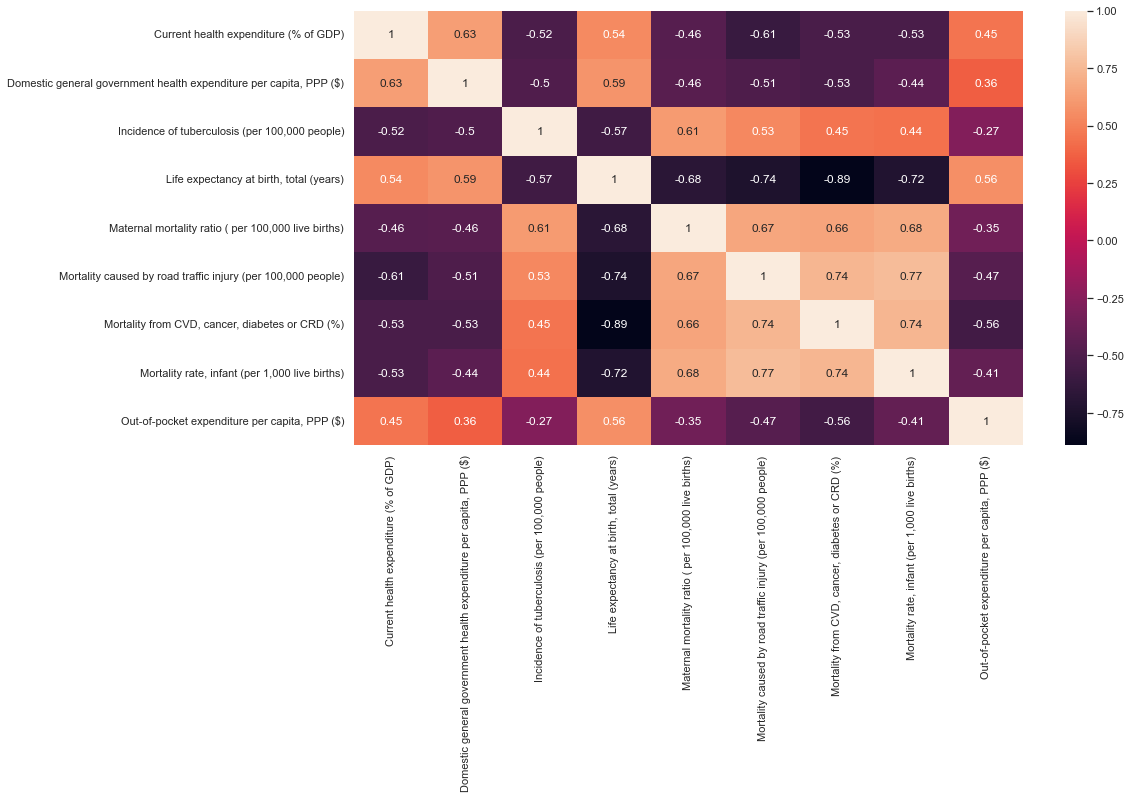

(602, 9)

In [32]:
num = health_rich.select_dtypes("number")
display(num.head())

cf = 0.5

columns = []
corr_matrix = num.corr()

for col in num.columns:
        if (abs(corr_matrix.loc[col,'Life expectancy at birth, total (years)']) >= cf):
            columns.append(col)
numerical_trimmed = pd.DataFrame(num, columns=columns)
pd.set_option('display.max_columns', None)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

numerical_trimmed = numerical_trimmed.drop(["Human capital index (HCI) (scale 0-1)", "Current health expenditure per capita, PPP ( $)", "Domestic general government health expenditure (% of GDP)","GNI per capita (US$)", "Lifetime risk of maternal death (%)", "Tuberculosis death rate (per 100,000 people)"], axis = 1)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

### Concatenate cat and num

# numerical_trimmed = pd.concat([numerical_trimmed, cat], axis = 1)
numerical_trimmed.shape

In [33]:
numerical_trimmed


Current health expenditure (% of GDP)  \
0                                 9.327589   
1                                 9.035971   
2                                 8.761164   
3                                 8.675648   
4                                 8.541538   
..                                     ...   
597                              14.594810   
598                              16.233503   
599                              14.498639   
600                              15.267015   
601                              13.981851   

     Domestic general government health expenditure per capita, PPP ($)  \
0                                          3005.886782                    
1                                          2891.697554                    
2                                          2820.146826                    
3                                          2691.582711                    
4                                          2755.143820                    
..                                                 ...                    
597                                        2761.534819                    
598                                        3714.851415                    
599                                        2578.606216                    
600                                        3515.599860                    
601                                        2406.651113                    

     Incidence of tuberculosis (per 100,000 people)  \
0                                               6.0   
1                                               6.5   
2                                               6.2   
3                                               6.6   
4                                               6.3   
..                                              ...   
597                                             5.7   
598                                             4.3   
599                                             5.9   
600                                             4.9   
601                                             6.0   

     Life expectancy at birth, total (years)  \
0                                  82.400000   
1                                  82.300000   
2                                  82.148780   
3                                  82.046341   
4                                  81.895122   
..                                       ...   
597                                77.487805   
598                                78.390244   
599                                77.036585   
600                                78.039024   
601                                76.936585   

     Maternal mortality ratio ( per 100,000 live births)  \
0                                                  6.0     
1                                                  6.0     
2                                                  6.0     
3                                                  6.0     
4                                                  6.0     
..                                                 ...     
597                                               13.0     
598                                               15.0     
599                                               13.0     
600                                               14.0     
601                                               13.0     

     Mortality caused by road traffic injury (per 100,000 people)  \
0                                                  5.2              
1                                                  5.4              
2                                                  5.3              
3                                                  5.8              
4                                                  5.9              
..                                                 ...              
597                                               15.8              
598                                     

In [34]:
# corr_matrix = numerical_trimmed.corr()
# sns.set(rc={'figure.figsize':(15,8)})
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [35]:
health2 =numerical_trimmed

### Train/test/split data

In [36]:
### X,y split

y = health2["Life expectancy at birth, total (years)"]
x = health2.drop(["Life expectancy at birth, total (years)"], axis = 1)

In [37]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 80)
print(x_train.shape)
print(x_test.shape)

(421, 8)
(181, 8)


## Scaling

In [38]:
### Normaliyation by columns 

transformer = MinMaxScaler().fit(x_train)
x_train_norm = transformer.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_train_norm

<IPython.core.display.Javascript object>

Current health expenditure (% of GDP)  \
0                                 0.606539   
1                                 0.425364   
2                                 0.124116   
3                                 0.455417   
4                                 0.489681   
..                                     ...   
416                               0.482871   
417                               0.426844   
418                               0.384848   
419                               0.463929   
420                               0.641354   

     Domestic general government health expenditure per capita, PPP ($)  \
0                                             0.573841                    
1                                             0.285037                    
2                                             0.172973                    
3                                             0.266450                    
4                                             0.427654                    
..                                                 ...                    
416                                           0.478913                    
417                                           0.277119                    
418                                           0.142539                    
419                                           0.251446                    
420                                           0.699149                    

     Incidence of tuberculosis (per 100,000 people)  \
0                                          0.126761   
1                                          0.047183   
2                                          0.105634   
3                                          0.050704   
4                                          0.026761   
..                                              ...   
416                                        0.032394   
417                                        0.070423   
418                                        0.091549   
419                                        0.030986   
420                                        0.027465   

     Maternal mortality ratio ( per 100,000 live births)  \
0                                                0.100     
1                                                0.025     
2                                                0.500     
3                                                0.225     
4                                                0.000     
..                                                 ...     
416                                              0.100     
417                                              0.150     
418                                              0.275     
419                                              0.025     
420                                              0.075     

     Mortality caused by road traffic injury (per 100,000 people)  \
0                                             0.081081              
1                                             0.285285              
2                                             0.708709              
3                                             0.240240              
4                                             0.105105              
..                                                 ...              
416                                           0.105105              
417                                           0.264264              
418                                           0.243243              
419                                           0.414414              
420                                           0.063063              

     Mortality from CVD, cancer, diabetes or CRD (%)  \
0                                           0.034602   
1                                           0.148789   
2                                           0.602076   
3                                           0.169550   
4                                           0.055363   
..  

In [39]:
transformer = MinMaxScaler().fit(x_test)
x_test_norm = transformer.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)
x_test_norm

<IPython.core.display.Javascript object>

Current health expenditure (% of GDP)  \
0                                 0.280020   
1                                 0.333335   
2                                 0.503511   
3                                 0.071538   
4                                 0.302393   
..                                     ...   
176                               0.424932   
177                               0.497521   
178                               0.303067   
179                               0.508825   
180                               0.506238   

     Domestic general government health expenditure per capita, PPP ($)  \
0                                             0.101107                    
1                                             0.247781                    
2                                             0.508112                    
3                                             0.121570                    
4                                             0.164919                    
..                                                 ...                    
176                                           0.386295                    
177                                           0.469822                    
178                                           0.158434                    
179                                           0.219834                    
180                                           0.268303                    

     Incidence of tuberculosis (per 100,000 people)  \
0                                          0.018048   
1                                          0.027406   
2                                          0.028743   
3                                          0.104278   
4                                          0.057487   
..                                              ...   
176                                        0.020722   
177                                        0.075153   
178                                        0.064171   
179                                        0.217914   
180                                        0.137701   

     Maternal mortality ratio ( per 100,000 live births)  \
0                                             0.250000     
1                                             0.142857     
2                                             0.214286     
3                                             0.642857     
4                                             0.107143     
..                                                 ...     
176                                           0.107143     
177                                           0.280612     
178                                           0.107143     
179                                           0.250000     
180                                           0.250000     

     Mortality caused by road traffic injury (per 100,000 people)  \
0                                             0.236686              
1                                             0.136095              
2                                             0.085799              
3                                             0.707101              
4                                             0.328402              
..                                                 ...              
176                                           0.112426              
177                                           0.092139              
178                                           0.357988              
179                                           0.423077              
180                                           0.192308              

     Mortality from CVD, cancer, diabetes or CRD (%)  \
0                                           0.097276   
1                                           0.342412   
2                                           0.167315   
3                                           0.680934   
4                                           0.428016   
..  

## Apply the linear model & results

In [40]:

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
mape_train = mean_absolute_percentage_error(y_pred_train, y_train)
mape_test = mean_absolute_percentage_error(y_pred_test, y_test)


print('\nResult model with split in ', '70/30')
print("R2 score of trained dataset is", round(r2_train,3))
print("R2 score of test dataset is", round(r2_test,3))

print("Mean absolute percentage error of train dataset is", round(mape_train, 2))
print("Mean absolute percentage error of test dataset is", round(mape_test, 2))
# print(round(lm.intercept_, 2))
# print(np.round_(lm.coef_))

print('\n\n Which feature impact the life expectancy?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance
#sorted_x = sorted(column_relevance.items(), key=lambda x: x[1])
#sorted_x


Result model with split in  70/30
R2 score of trained dataset is 0.836
R2 score of test dataset is 0.809
Mean absolute percentage error of train dataset is 0.01
Mean absolute percentage error of test dataset is 0.01


 Which feature impact the life expectancy?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Mortality from CVD, cancer, diabetes or CRD (%)', -11.0),
 ('Incidence of tuberculosis (per 100,000 people)', -3.0),
 ('Out-of-pocket expenditure per capita, PPP ($)', 2.0),
 ('Domestic general government health expenditure per capita, PPP ($)', 2.0),
 ('Mortality rate, infant (per 1,000 live births)', -2.0),
 ('Current health expenditure (% of GDP)', -1.0),
 ('Maternal mortality ratio ( per 100,000 live births)', -1.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -1.0)]

In [41]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=10,
                             min_samples_split=10,
                             min_samples_leaf =5,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n Which feature impact the life expectancy?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance

The R2 for the Random Forest in the TRAIN set is 0.97
The R2 for the Random Forest in the TEST  set is 0.94


 Which feature impact the life expectancy?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Mortality from CVD, cancer, diabetes or CRD (%)', -11.0),
 ('Incidence of tuberculosis (per 100,000 people)', -3.0),
 ('Out-of-pocket expenditure per capita, PPP ($)', 2.0),
 ('Domestic general government health expenditure per capita, PPP ($)', 2.0),
 ('Mortality rate, infant (per 1,000 live births)', -2.0),
 ('Current health expenditure (% of GDP)', -1.0),
 ('Maternal mortality ratio ( per 100,000 live births)', -1.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -1.0)]

In [42]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

y_pred = clf.predict(x_test_norm)
print('\n\n Which feature impact the life expectancy?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance



The R2 for the Random Forest in the TRAIN set is 0.99
The R2 for the Random Forest in the TEST  set is 0.95


 Which feature impact the life expectancy?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Mortality from CVD, cancer, diabetes or CRD (%)', -11.0),
 ('Incidence of tuberculosis (per 100,000 people)', -3.0),
 ('Out-of-pocket expenditure per capita, PPP ($)', 2.0),
 ('Domestic general government health expenditure per capita, PPP ($)', 2.0),
 ('Mortality rate, infant (per 1,000 live births)', -2.0),
 ('Current health expenditure (% of GDP)', -1.0),
 ('Maternal mortality ratio ( per 100,000 live births)', -1.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -1.0)]